In [6]:
from bs4 import BeautifulSoup

html = '''
<div id="result1">
<p class=row>
<a class="red" href="/link1">링크1</a>
<a class="blue" href="/link2">링크2</a>
</p>
<p class=row>
<a class="red" href="/link1">링크1</a>
<a class="blue" href="/link2">링크2</a>
</p>
</div>
<div id="result2">
<p class=row>
<a class="red" href="/link1">링크1</a>
<a class="blue" href="/link2">링크2</a>
</p>
<p class=row>
<a class="red" href="/link1">링크1</a>
<a class="blue" href="/link2">링크2</a>
</p>
</div>
'''
dom = BeautifulSoup(html, 'html5lib')

In [7]:
dom

<html><head></head><body><div id="result1">
<p class="row">
<a class="red" href="/link1">링크1</a>
<a class="blue" href="/link2">링크2</a>
</p>
<p class="row">
<a class="red" href="/link1">링크1</a>
<a class="blue" href="/link2">링크2</a>
</p>
</div>
<div id="result2">
<p class="row">
<a class="red" href="/link1">링크1</a>
<a class="blue" href="/link2">링크2</a>
</p>
<p class="row">
<a class="red" href="/link1">링크1</a>
<a class="blue" href="/link2">링크2</a>
</p>
</div>
</body></html>

In [8]:
# dom.find_all('a')
dom.find(attrs={'id':'result1'}).find(recursive=False).find_all(recursive=False)

[<a class="red" href="/link1">링크1</a>, <a class="blue" href="/link2">링크2</a>]

In [9]:
div = dom.select_one('#result1')
p = div.select_one('p')
p.select('a')

[<a class="red" href="/link1">링크1</a>, <a class="blue" href="/link2">링크2</a>]

In [10]:
#css 표현법 - 구조와 속성을 같이 담을거임
dom.select('#result1 > p > a')


[<a class="red" href="/link1">링크1</a>,
 <a class="blue" href="/link2">링크2</a>,
 <a class="red" href="/link1">링크1</a>,
 <a class="blue" href="/link2">링크2</a>]

In [11]:
dom.select('#result1 > p:first-child > a')

[<a class="red" href="/link1">링크1</a>, <a class="blue" href="/link2">링크2</a>]

In [12]:
dom.select('#result1 > p:nth-child(1) > a')

[<a class="red" href="/link1">링크1</a>, <a class="blue" href="/link2">링크2</a>]

In [14]:
dom.select('#result1 > p:has(+p) > a')
# +는 next_sibling 
# p + p(*) 는 맨마지막 찾는거임.
# (*)p:has(+ p)


[<a class="red" href="/link1">링크1</a>, <a class="blue" href="/link2">링크2</a>]

In [15]:
dom.select('#result1 > p+p > a')

[<a class="red" href="/link1">링크1</a>, <a class="blue" href="/link2">링크2</a>]

In [16]:
dom.select('#result1 > p:has(+p) > a')[0] \
 is dom.select('#result1 > p+p > a')[0]

False

In [18]:
dom.find('article').find_all('a')

AttributeError: 'NoneType' object has no attribute 'find_all'

In [20]:
dom.select('article a')

[]

In [151]:
from requests import request
from requests.exceptions import HTTPError
from time import sleep

def download(url, params={}, method='GET', retries=3):
    resp = None
    
    try:
        resp = request(method, url,
                       params=params if method=='GET' else {},
                       data=params if method=='POST' else {},
                       headers={'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.366'}
                      )
        resp.raise_for_status()
    except HTTPError as e:
        if 500 <= e.response.status_code:
            if retries > 0:
                sleep(3)
                resp = download(url, params=params,
                                method=method,
                                retries=retries-1)
            else:
                print('재방문 횟수 초과')
        else:
            print('Request', resp.request.headers)
            print('Response', e.response.headers)
        
    return resp

In [22]:
resp = download('http://pythonscraping.com/pages/page3.html')
dom = BeautifulSoup(resp.text, 'html5lib')

In [28]:
table = dom.find('table')
tbody = table.find('tbody')
for tr in tbody.find_all('tr'):
    print(type(tr.find_all(recursive=False)[-1]))
    print(tr.find_all(recursive=False)[-1])

<class 'bs4.element.Tag'>
<th>
Image
</th>
<class 'bs4.element.Tag'>
<td>
<img src="../img/gifts/img1.jpg"/>
</td>
<class 'bs4.element.Tag'>
<td>
<img src="../img/gifts/img2.jpg"/>
</td>
<class 'bs4.element.Tag'>
<td>
<img src="../img/gifts/img3.jpg"/>
</td>
<class 'bs4.element.Tag'>
<td>
<img src="../img/gifts/img4.jpg"/>
</td>
<class 'bs4.element.Tag'>
<td>
<img src="../img/gifts/img6.jpg"/>
</td>


In [29]:
print(type(dom.select('table > tbody > tr > td > img')))
dom.select('table > tbody > tr > td > img') #구조와 속성을 다 넣을 수 있는 훨씬 간단한 방법이다.

<class 'bs4.element.ResultSet'>


[<img src="../img/gifts/img1.jpg"/>,
 <img src="../img/gifts/img2.jpg"/>,
 <img src="../img/gifts/img3.jpg"/>,
 <img src="../img/gifts/img4.jpg"/>,
 <img src="../img/gifts/img6.jpg"/>]

In [32]:
dom.select('tr:has(td:has( > img[src$=jpg]))')

[<tr class="gift" id="gift1"><td>
 Vegetable Basket
 </td><td>
 This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
 <span class="excitingNote">Now with super-colorful bell peppers!</span>
 </td><td>
 $15.00
 </td><td>
 <img src="../img/gifts/img1.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift2"><td>
 Russian Nesting Dolls
 </td><td>
 Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
 </td><td>
 $10,000.52
 </td><td>
 <img src="../img/gifts/img2.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift3"><td>
 Fish Painting
 </td><td>
 If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
 </td><td>
 $10,005.00
 </td><td>
 <img src="../img/gifts/img3.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift4"><td>
 Dead Parrot
 </

In [33]:
#얘를 쓰면 또 좋은점 : 만약 홀수행, 짝수행을 선택하고 싶다하면
table = dom.find('table')
tbody = table.find('tbody')
for tr in tbody.find_all('tr'):
    #홀수, 짝수에 대한 처리 코드를 여기 넣어줘야하는데
    print(type(tr.find_all(recursive=False)[-1]))
    print(tr.find_all(recursive=False)[-1])

In [42]:
# dom.select('tbody > tr:nth-child(2n)') #짝수행
# dom.select('tbody > tr:nth-child(even)') #짝수행
# dom.select('tbody > tr:nth-child(even|2n)') #짝수행 : 왜 안되노...
# dom.select('tbody > tr:nth-child(2n-1)') #홀수행 
# dom.select('tbody > tr:nth-odd|2n-1') #홀수행 : 왜 안되노...

In [43]:
resp = download('https://www.google.com/search', {'q':'카리나'})

In [95]:
resp.status_code, resp.headers['content-type']

(200, 'text/html; charset=utf-8')

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>카리나 - Google 검색</title><script nonce="5oCbWtAO7oGxtS77huNFjw">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){var _g={kEI:\'w6kDZZqUAeiNxc8Pu6GGsA8\',kEXPI:\'31\',kBL:\'Qov-\',kOPI:89978449};(function(){var a;(null==(a=window.google)?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn=\'web\';google.kHL=\'ko\';})();(function(){\nvar h=this||self;function l(){return void 0!==window.google&&void 0!==window.google.kOPI&&0!==window.google.kOPI?window.google.kOPI:null};var m,n=[];function p(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||m}function q(a){for(var b=null;a&&(!a.getA
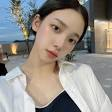
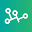
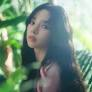
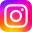
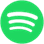
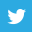
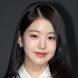
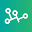
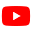
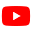
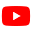
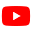
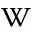
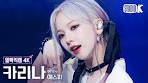
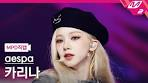
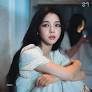
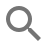
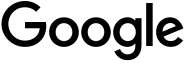

In [59]:
resp.text

In [46]:
dom = BeautifulSoup(resp.text, 'html5lib')

In [51]:
len(dom.select('h3')), dom.select('h3')
dom.select('.LC20lb.MBeuO.DKV0Md')

[<h3 class="LC20lb MBeuO DKV0Md">카리나(aespa)</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">AESPA KARINA 카리나 (@karina_aespas_)</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">카리나(aespa) (r3170 판)</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">#PictureChallenge with #KARINA #GISELLE #HYO #효연 ...</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">230625 aespa(에스파) 'Next Level' 카리나 KARINA 4K Cam ...</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">Chicago #pinkchampagne #aespa #æspa #에스파 ... - YouTube</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">[입덕직캠] 에스파 카리나 직캠 4K 'Spicy' (aespa ... - YouTube</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">카리나 (가수) - 위키백과, 우리 모두의 백과사전</h3>]

In [55]:
len(dom.select('.LC20lb')) ,\
len(dom.select('h3.LC20lb'))

(8, 8)

In [58]:
len(dom.select('a > h3.LC20lb.MBeuO.DKV0Md'))

8

[<a data-ved="2ahUKEwjagfCosquBAxXoRvEDHbuQAfYQFnoECEEQAQ" href="https://namu.wiki/w/%EC%B9%B4%EB%A6%AC%EB%82%98(aespa)" jsaction="rcuQ6b:npT2md" jscontroller="M9mgyc" jsname="UWckNb" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;opi=89978449&amp;url=https://namu.wiki/w/%25EC%25B9%25B4%25EB%25A6%25AC%25EB%2582%2598(aespa)&amp;ved=2ahUKEwjagfCosquBAxXoRvEDHbuQAfYQFnoECEEQAQ"><br/><h3 class="LC20lb MBeuO DKV0Md">카리나(aespa)</h3><div class="notranslate TbwUpd NJjxre iUh30 ojE3Fb"><span class="H9lube"><div aria-hidden="true" class="eqA2re NjwKYd Vwoesf"></div></span><div><span class="VuuXrf">나무위키</span><div class="byrV5b"><cite class="qLRx3b tjvcx GvPZzd cHaqb" role="text">https://namu.wiki<span class="dyjrff ob9lvb" role="text"> › 카리나(aespa)</span></cite></div></div></div></a>,
 <a data-ved="2ahUKEwjagfCosquBAxXoRvEDHbuQAfYQFnoECCIQAQ" href="https://www.instagram.com/karina_aespas_/" jsaction="rcuQ6b:npT2md" jscontroller="M9mgyc" jsname="UWckNb" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;
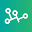
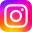
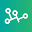
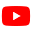
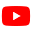
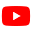
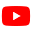
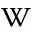

In [60]:
dom.select('a[jsname="UWckNb"]')

In [61]:
for a in dom.select('a:has(> h3.LC20lb.MBeuO.DKV0Md)'):
    print(a.attrs['href'])
    print(a.select_one('h3').text)

https://namu.wiki/w/%EC%B9%B4%EB%A6%AC%EB%82%98(aespa)
카리나(aespa)
https://www.instagram.com/karina_aespas_/
AESPA KARINA 카리나 (@karina_aespas_)
https://namu.wiki/w/%EC%B9%B4%EB%A6%AC%EB%82%98(aespa)?rev=3170
카리나(aespa) (r3170 판)
https://www.youtube.com/watch?v=gO_ONOnzH-s
#PictureChallenge with #KARINA #GISELLE #HYO #효연 ...
https://www.youtube.com/watch?v=v63rTR68TdA
230625 aespa(에스파) 'Next Level' 카리나 KARINA 4K Cam ...
https://www.youtube.com/shorts/Dul1Q0SK0n4
Chicago #pinkchampagne #aespa #æspa #에스파 ... - YouTube
https://www.youtube.com/watch?v=kpEbQOzJb00
[입덕직캠] 에스파 카리나 직캠 4K 'Spicy' (aespa ... - YouTube
https://ko.wikipedia.org/wiki/%EC%B9%B4%EB%A6%AC%EB%82%98_(%EA%B0%80%EC%88%98)
카리나 (가수) - 위키백과, 우리 모두의 백과사전


In [63]:
#다음으로 실습
# https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EC%B9%B4%EB%A6%AC%EB%82%98
resp = download('https://search.daum.net/search', {'w':'tot'
                                           , 'q' : '카리나'})

In [65]:
resp.status_code, resp.headers['content-type']

(200, 'text/html; charset=utf-8')

In [69]:
dom = BeautifulSoup(resp.text, 'html5lib')

In [74]:
#뉴스의 링크
# dom.select('a .tit_main .fn_tit_u') #속성만 이용(클래스)
# dom.select('.wrap_cont > a.tit_main ') #부모 관계와 속성 이용
# dom.select('.wrap_thumb[id] + .wrap_cont')
len(dom.select('.wrap_thumb[id] + .wrap_cont'))

4

In [80]:
# len(dom.select('#container > li > div:last-child > a'))
for a in dom.select('#container > li > div:last-child > a'):
    print(a.text.strip())
    print(a.attrs['href'])

에스파 카리나, 걸어 다니는 인형… 일상이 화보
https://v.daum.net/v/20230903232408019?f=o
카리나, 중단발 사진 공개…단발 욕구↑
https://v.daum.net/v/20230911172827349?f=o
에스파 카리나, 모자 커 보이는 착시 효과… ‘소두 인증’
https://v.daum.net/v/20230911185502680?f=o
카리나, 모자 커 보이는 착시효과..뉴욕시 '천사 강림' [스타IN★]
https://v.daum.net/v/20230911183359250?f=o


In [81]:
dom.select('strong > a')

[]

In [82]:
dom.select_one('.tit-g .clamp-g') #자바스크립트가 한번 더 변환시켰기 때문에 제대로 입력했음에도 결과가 안나오는거다.

In [84]:
dom

<!DOCTYPE html>
<html class="pc win chrome" lang="ko" xmlns="http://www.w3.org/1999/xhtml"><head profile="http://a9.com/-/spec/opensearch/1.1/">
    <meta content="text/html;charset=utf-8" http-equiv="content-Type"/>
    <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
    <meta content="off" name="autocomplete"/>
    <meta content="always" name="referrer"/>
    <meta content="telephone=no" name="format-detection"/>
    <meta content="카리나 – Daum 검색" property="og:title"/>
    <meta content="https://search.daum.net/search?w=tot&amp;q=%EC%B9%B4%EB%A6%AC%EB%82%98" property="og:url"/>
    <meta content="Daum 검색에서 카리나에 대한 최신정보를 찾아보세요." property="og:description"/>
    <meta content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" property="og:image"/>
    <meta content="다음검색" property="og:site_name"/>
    <title>카리나 – Daum 검색</title>

    
<link href="//search.daum.net/OpenSearch.xml" rel="search" title="Daum" type="application/opensearchdescription+xml"/>

    
<li

In [85]:
dom.select('c-doc-web > c-title')

[<c-title data-extra-log='{"twa":{"e2":"","rank":1,"topic":{}}}' data-href="https://ko.wikipedia.org/wiki/%EC%B9%B4%EB%A6%AC%EB%82%98%20%28%EB%B0%B0%EC%9A%B0%29" data-log="dc=TWA&amp;at=link&amp;p=99&amp;r=1&amp;d=2FeIJBvzlxu7bo-SvG&amp;sc=1DV" data-target="_blank" slot="title"><b>카리나</b> (배우)</c-title>,
 <c-title data-extra-log='{"twa":{"e2":"","rank":2,"topic":{}}}' data-href="https://namu.wiki/w/%EC%B9%B4%EB%A6%AC%EB%82%98(%EA%B0%80%EB%94%94%EC%96%B8%20%ED%85%8C%EC%9D%BC%EC%A6%88)" data-log="dc=TWA&amp;at=link&amp;p=99&amp;r=2&amp;d=373a1326f3f5a63f38a0e016b2adc2abec4ea52d&amp;gd=web-namu-NzoTJvP1pj84oOAW&amp;sc=WSA&amp;bfdc=false" data-target="_blank" slot="title"><b>카리나</b>(가디언 테일즈) - 나무위키</c-title>,
 <c-title data-extra-log='{"twa":{"e2":"","rank":3,"topic":{"연예":972565}}}' data-href="https://cafe.daum.net/subdued20club/ReHf/4523290?q=%EC%B9%B4%EB%A6%AC%EB%82%98&amp;re=1" data-log="dc=TWD&amp;at=link&amp;p=99&amp;r=3&amp;d=23afakeY0_mVdU2S8V&amp;gd=cafe-1IHuH/ReHf/4523290&amp;sc=

In [87]:
for title in dom.select('c-doc-web > c-title'):
    print(title.text)
    print(title.attrs['data-href'])

카리나 (배우)
https://ko.wikipedia.org/wiki/%EC%B9%B4%EB%A6%AC%EB%82%98%20%28%EB%B0%B0%EC%9A%B0%29
카리나(가디언 테일즈) - 나무위키
https://namu.wiki/w/%EC%B9%B4%EB%A6%AC%EB%82%98(%EA%B0%80%EB%94%94%EC%96%B8%20%ED%85%8C%EC%9D%BC%EC%A6%88)
데뷔 이래 가장 짧은 머리인 카리나
https://cafe.daum.net/subdued20club/ReHf/4523290?q=%EC%B9%B4%EB%A6%AC%EB%82%98&re=1
카리나 달글 8 100일동안 작성한📝 카푸🐱의 성장🌱일기를 볼 때는 👀 주위는 환하게💡 최대한 오래 🩵💙
https://cafe.daum.net/Duckgu/D2nu/41411?q=%EC%B9%B4%EB%A6%AC%EB%82%98&re=1
고윤정 vs 카리나
https://cafe.daum.net/ssaumjil/LnOm/3029160?q=%EC%B9%B4%EB%A6%AC%EB%82%98&re=1
손흥민이 월드컵 우승시키기 vs 카리나랑 결혼하기
https://cafe.daum.net/dotax/Elgq/4240303?q=%EC%B9%B4%EB%A6%AC%EB%82%98&re=1
AI로 만든 에스파 카리나 바비.jpg
https://table.cafe.daum.net/p/1217111531/207167064921750272
에스파 윈터 가뿐하게 공주님 안기 성공하는 지젤 보고 호기롭게 도전하는 카리나
https://table.cafe.daum.net/p/1000055110/176847531157393664
최근 화제가 되고 있는 에스파 카리나 다이어트와 다이어트 식단
https://nizniz.tistory.com/149
시에나를 제대로 즐기는 방법 - 만지아의 탑, 캄포광장,시에나 대성당, 카타리나 그리고 카리나
https://brunch.co.kr/@gle-bay/204
원샷 카리나 -

In [94]:
for a in dom.select('''
#container > li > div:last-child > a,
c-doc-web > c-title
'''):
    print(a.text.strip())
    print(a.attrs[
          ('' if a.has_attr('href') else 'data-') + 'href'])

에스파 카리나, 걸어 다니는 인형… 일상이 화보
https://v.daum.net/v/20230903232408019?f=o
카리나, 중단발 사진 공개…단발 욕구↑
https://v.daum.net/v/20230911172827349?f=o
에스파 카리나, 모자 커 보이는 착시 효과… ‘소두 인증’
https://v.daum.net/v/20230911185502680?f=o
카리나, 모자 커 보이는 착시효과..뉴욕시 '천사 강림' [스타IN★]
https://v.daum.net/v/20230911183359250?f=o
카리나 (배우)
https://ko.wikipedia.org/wiki/%EC%B9%B4%EB%A6%AC%EB%82%98%20%28%EB%B0%B0%EC%9A%B0%29
카리나(가디언 테일즈) - 나무위키
https://namu.wiki/w/%EC%B9%B4%EB%A6%AC%EB%82%98(%EA%B0%80%EB%94%94%EC%96%B8%20%ED%85%8C%EC%9D%BC%EC%A6%88)
데뷔 이래 가장 짧은 머리인 카리나
https://cafe.daum.net/subdued20club/ReHf/4523290?q=%EC%B9%B4%EB%A6%AC%EB%82%98&re=1
카리나 달글 8 100일동안 작성한📝 카푸🐱의 성장🌱일기를 볼 때는 👀 주위는 환하게💡 최대한 오래 🩵💙
https://cafe.daum.net/Duckgu/D2nu/41411?q=%EC%B9%B4%EB%A6%AC%EB%82%98&re=1
고윤정 vs 카리나
https://cafe.daum.net/ssaumjil/LnOm/3029160?q=%EC%B9%B4%EB%A6%AC%EB%82%98&re=1
손흥민이 월드컵 우승시키기 vs 카리나랑 결혼하기
https://cafe.daum.net/dotax/Elgq/4240303?q=%EC%B9%B4%EB%A6%AC%EB%82%98&re=1
AI로 만든 에스파 카리나 바비.jpg
https://table.cafe.daum.net/p/1

In [118]:
import re

In [150]:
from requests.compat import urljoin

#방문할 목록
url = 'https://www.google.com/search?q=%EC%B9%B4%EB%A6%AC%EB%82%98&sca_esv=565424292&sxsrf=AM9HkKlcaf4LJjUxgfb8VMUdPIpEaASYhA%3A1694743663695&ei=b7wDZaaIKqPi1e8P86a1mAg&ved=0ahUKEwjm-7yQxKuBAxUjcfUHHXNTDYMQ4dUDCBA&uact=5&oq=%EC%B9%B4%EB%A6%AC%EB%82%98&gs_lp=Egxnd3Mtd2l6LXNlcnAiCey5tOumrOuCmDIHECMYigUYJzIEECMYJzIHECMYigUYJzILEAAYgAQYsQMYgwEyCxAAGIAEGLEDGIMBMgsQABiABBixAxiDATIEEAAYAzIEEAAYAzIEEAAYAzIFEC4YgARIjhNQAFjFCXACeAGQAQKYAc0BoAH-B6oBBTAuNS4xuAEDyAEA-AEB4gMEGAAgQYgGAQ&sclient=gws-wiz-serp'
URLs = []
URLs.append((url, 0))
#(url, depth) [0] : url, [1]:depth

#방문한 적이 있는 목록
seens = []

#전략; BFS(Queue)/DFS(Stack)
# search space가 너무 크니 Focused Crawling 으로 돌려야해. 휴리스틱한 방식이므로, 내가 전략을 짤 수 있다. 
while URLs:
    # 종료 조건; 더이상 URL이 없을때까지
	seed = URLs.pop(-1)
    seens.append(seed) #무조건 방문 기록으로 남길려고
    
    # (루트)에 가서 robots.txt
	resp = download(seed)

    if resp.status_code !=200:
        continue

    if re.search('text/html', resp.headers['content-type']):
        dom = BeautifulSoup(resp.text, 'html5lib')
        for link in dom.select('*[href], *[src], *[action]'):
            if link.has_attr('src'):
                href = link.attrs['src']
            elif link.has_attr('href'):
                href = link.attrs['href']
            elif link.has_attr('action'):
                href = link.attrs['action']

            if not re.match('(?:#)|(?:javascript)|(?:data)|(?:mailto)', href):
                #링크를 절대주소의 형태로 변환
                newurl = urljoin(resp.request.url, href)
                # 링크를 방문한적이 있는가?
                if newurl not in seens and\
                    newurl not in URLs:
                    #URLs. append (새롭게 찾은 링크)
                    URLs.append(newurl)
    
        # break
# # 링크를 방문한적이 있는가?
# # URLs.append(새롭게 찾은 링크)
#             href => http(s) 절대주소, path, (..)/path 상대주소
#             javascript(동일한 페이지임. 행위를 담당하는 애다): #(fragment) , #data, mailto, tel, ... 이런애들 다 걸러야해. 그래서 정규식 가지고 매치를 하는거임.
#             if link['href' if link.has_attr('href') else (
#                 'src' if link.has_attr('src') else 'action'
#             )]


# 	seed => (HTTP) Req/Resp

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 17)

In [106]:
len(URLs), len(seens)

NameError: name 'URLs' is not defined

In [97]:
len(dom.select('*[href], *[src], *[action]'))

[<link href="//search.daum.net/OpenSearch.xml" rel="search" title="Daum" type="application/opensearchdescription+xml"/>,
 <link charset="utf-8" href="//search1.daumcdn.net/search/statics/common/css/2023/p_common.0911014533.css" rel="stylesheet" type="text/css"/>,
 <link charset="utf-8" href="//search1.daumcdn.net/search/statics/common/css/2023/p_component.0904051313.css" rel="stylesheet" type="text/css"/>,
 <link charset="utf-8" href="//search1.daumcdn.net/search/statics/common/css/2023/pm_common.0911014533.css" rel="stylesheet" type="text/css"/>,
 <link charset="utf-8" href="//search1.daumcdn.net/search/statics/common/css/2023/p_collection.0626024013.css" rel="stylesheet" type="text/css"/>,
 <link charset="utf-8" href="//search1.daumcdn.net/search/statics/common/css/2023/p_collection2.0502112331.css" rel="stylesheet" type="text/css"/>,
 <link charset="utf-8" href="//search1.daumcdn.net/search/statics/common/css/2023/p_newsColl.0620091746.css" rel="stylesheet" type="text/css"/>,
 <link

In [154]:
from requests.compat import urljoin

#방문할 목록
url = 'https://www.google.com/search?q=%EC%B9%B4%EB%A6%AC%EB%82%98&sca_esv=565424292&sxsrf=AM9HkKlcaf4LJjUxgfb8VMUdPIpEaASYhA%3A1694743663695&ei=b7wDZaaIKqPi1e8P86a1mAg&ved=0ahUKEwjm-7yQxKuBAxUjcfUHHXNTDYMQ4dUDCBA&uact=5&oq=%EC%B9%B4%EB%A6%AC%EB%82%98&gs_lp=Egxnd3Mtd2l6LXNlcnAiCey5tOumrOuCmDIHECMYigUYJzIEECMYJzIHECMYigUYJzILEAAYgAQYsQMYgwEyCxAAGIAEGLEDGIMBMgsQABiABBixAxiDATIEEAAYAzIEEAAYAzIEEAAYAzIFEC4YgARIjhNQAFjFCXACeAGQAQKYAc0BoAH-B6oBBTAuNS4xuAEDyAEA-AEB4gMEGAAgQYgGAQ&sclient=gws-wiz-serp'
URLs = []
URLs.append((url, 0))
#(url, depth) [0] : url, [1]:depth

#방문한 적이 있는 목록
seens = []



In [155]:
#전략; BFS(Queue)/DFS(Stack)
# search space가 너무 크니 Focused Crawling 으로 돌려야해. 휴리스틱한 방식이므로, 내가 전략을 짤 수 있다. 
while URLs:
    # 종료 조건; 더이상 URL이 없을때까지
    seed = URLs.pop(-1)
    seens.append(seed) 
#무조건 방문 기록으로 남길려고
    
 #    # (루트)에 가서 robots.txt
    resp = download(seed)

    if resp.status_code !=200:
        continue

    if re.search('text/html', resp.headers['content-type']):
        dom = BeautifulSoup(resp.text, 'html5lib')
        for link in dom.select('*[href], *[src], *[action]'):
            if link.has_attr('src'):
                href = link.attrs['src']
            elif link.has_attr('href'):
                href = link.attrs['href']
            elif link.has_attr('action'):
                href = link.attrs['action']

            if not re.match('(?:#)|(?:javascript)|(?:data)', href):
                #링크를 절대주소의 형태로 변환
                newurl = urljoin(resp.request.url, href)
                # 링크를 방문한적이 있는가?
                if seed[1] > 3:
                    continue
                    #최대 뎁스가 2인거까지만 링크를 수집할거임. 
                if newurl not in list(map(lambda r:r[0], seens)) and\
                    newurl not in list(map(lambda r:r[0], URLs)):
                    #URLs. append (새롭게 찾은 링크)
                    URLs.append((newurl, seed[1]+1))

InvalidSchema: No connection adapters were found for "('https://www.google.com/search?q=%EC%B9%B4%EB%A6%AC%EB%82%98&sca_esv=565424292&sxsrf=AM9HkKlcaf4LJjUxgfb8VMUdPIpEaASYhA%3A1694743663695&ei=b7wDZaaIKqPi1e8P86a1mAg&ved=0ahUKEwjm-7yQxKuBAxUjcfUHHXNTDYMQ4dUDCBA&uact=5&oq=%EC%B9%B4%EB%A6%AC%EB%82%98&gs_lp=Egxnd3Mtd2l6LXNlcnAiCey5tOumrOuCmDIHECMYigUYJzIEECMYJzIHECMYigUYJzILEAAYgAQYsQMYgwEyCxAAGIAEGLEDGIMBMgsQABiABBixAxiDATIEEAAYAzIEEAAYAzIEEAAYAzIFEC4YgARIjhNQAFjFCXACeAGQAQKYAc0BoAH-B6oBBTAuNS4xuAEDyAEA-AEB4gMEGAAgQYgGAQ&sclient=gws-wiz-serp', 0)"

In [170]:
from requests import request
from requests.exceptions import HTTPError
from time import sleep

def download(url, params={}, method='GET', retries=3):
    resp = None
    
    try:
        resp = request(method, url,
                       params=params if method=='GET' else {},
                       data=params if method=='POST' else {},
                       headers={'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.366'}
                      )
        resp.raise_for_status()
    except HTTPError as e:
        if 500 <= e.response.status_code:
            if retries > 0:
                sleep(3)
                resp = download(url, params=params,
                                method=method,
                                retries=retries-1)
            else:
                print('재방문 횟수 초과')
        else:
            print('Request', resp.request.headers)
            print('Response', e.response.headers)
        
    return resp

In [ ]:
from requests.compat import urljoin
from urllib.parse import urlparse

#방문할 목록
url = 'https://www.google.com/search?q=%EC%B9%B4%EB%A6%AC%EB%82%98'
URLs = []
URLs.append((url, 0))
#(url, depth) [0] : url, [1]:depth

#방문한 적이 있는 목록
seens = []
domain = ['www.google.com'] #이렇게 쓰면 정규식안써도 된다고 한다. 

#전략; BFS(Queue)/DFS(Stack)
# search space가 너무 크니 Focused Crawling 으로 돌려야해. 휴리스틱한 방식이므로, 내가 전략을 짤 수 있다. 
while URLs:
    # 종료 조건; 더이상 URL이 없을때까지
    seed = URLs.pop(-1)
    seens.append(seed) 
#무조건 방문 기록으로 남길려고
    
 #    # (루트)에 가서 robots.txt
    resp = download(seed[0])

    if resp.status_code !=200:
        continue

    if re.search('text/html', resp.headers['content-type']):
        dom = BeautifulSoup(resp.text, 'html5lib')
        for link in dom.select('*[href], *[src], *[action]'):
            if link.has_attr('src'):
                href = link.attrs['src']
            elif link.has_attr('href'):
                href = link.attrs['href']
            elif link.has_attr('action'):
                href = link.attrs['action']

            if not re.match('(?:#)|(?:javascript)|(?:data)', href):
                #링크를 절대주소의 형태로 변환
                newurl = urljoin(resp.request.url, href)
                # 링크를 방문한적이 있는가?

                #depth 제한
                if seed[1] > 3:
                    continue
                    #최대 뎁스가 2인거까지만 링크를 수집할거임. 
                
                # whitelist ; opt-in
                # blacklist ; opt-out; in으로 바꾸면
                if urlparse(newurl).netloc in domain:
                    continue #화이트리스트 이다. in 으로 바꾸면 블랙리스트가 된다.
                
                if newurl not in list(map(lambda r:r[0], seens)) and\
                    newurl not in list(map(lambda r:r[0], URLs)):
                    #URLs. append (새롭게 찾은 링크)
                    URLs.append((newurl, seed[1]+1))

In [ ]:
list(map(lambda r:urlparse(r[0]).netloc, URLs))

In [ ]:
len(URLs)

In [ ]:
###스크래핑